Trabalho Data Science - Análise Exploratória do Dataset de Receitas da Prefeitura Municipal de Curitiba

Alunos: Igor Cristian Gomes Mucharski - Raphael Marangoni - Vinicius Lisboa

--------------------------------------------------------------------------------

Vamos iniciar importando o pandas e clonando o repositório do Github com os datasets

In [1]:
import pandas as pd

%matplotlib inline

In [2]:
!git clone https://github.com/up-uppers/data-science-trabalho.git

Cloning into 'data-science-trabalho'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 53 (delta 14), reused 31 (delta 8), pack-reused 0
Unpacking objects: 100% (53/53), done.


Agora, vamos ler os dados do dataset

In [3]:
dataset = pd.read_csv('data-science-trabalho/datasets/2022-10-01_Receitas_-_Base_de_Dados.csv', on_bad_lines='skip', delimiter=';')

dataset

,CD_RECEITA,CD_CATEGORIA,DESCRICAO_CATEGORIA,CD_ORIGEM,DESCRICAO_ORIGEM,CD_ESPECIE,DESCRICAO_ESPECIE,CD_RUBRICA,DESCRICAO_RUBRICA,CD_ALINEA,DESCRICAO_ALINEA,CD_SUBALINEA,DESCRICAO_SUBALINEA,CD_EXERCICIO,DT_APROPRIACAO,TP_RECEITA_ORC,CD_EMPRESA,NM_EMPRESA,VL_RECEITA,"DS_FONTE,,,"
0,6000030700000000000000,6,RECEITA EXTRA-ORÇAMENTÁRIA,0,NaN,0,NaN,0.0,NaN,3.0,NaN,7.0,NaN,2022,2022-08-31,Extra-Orçamentária,9,Fundo de Urbanização de Curitiba,"61852,58","Retenções em Carater Consignatório,,"
1,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"226,07","Taxas - Exercício Poder de Polícia,"
2,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"270,03","Taxas - Exercício Poder de Polícia,"
3,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"37,68","Taxas - Exercício Poder de Polícia,"
4,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"2143,55","Taxas - Exercício Poder de Polícia,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90074,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"143,75","Demais Impostos Vinculados à Educação Básica,"
90075,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"345,01","Recursos Ordinários (Livres),"
90076,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"251,38","Saúde - Receitas Vinculadas (EC 29/00 - 15%),"
90077,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"418,97","Demais Impostos Vinculados à Educação Básica,"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90079 entries, 0 to 90078
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CD_RECEITA           90079 non-null  object 
 1   CD_CATEGORIA         90079 non-null  int64  
 2   DESCRICAO_CATEGORIA  90079 non-null  object 
 3   CD_ORIGEM            90079 non-null  int64  
 4   DESCRICAO_ORIGEM     80432 non-null  object 
 5   CD_ESPECIE           90079 non-null  int64  
 6   DESCRICAO_ESPECIE    80429 non-null  object 
 7   CD_RUBRICA           8545 non-null   float64
 8   DESCRICAO_RUBRICA    0 non-null      float64
 9   CD_ALINEA            8545 non-null   float64
 10  DESCRICAO_ALINEA     0 non-null      float64
 11  CD_SUBALINEA         8545 non-null   float64
 12  DESCRICAO_SUBALINEA  0 non-null      float64
 13  CD_EXERCICIO         90079 non-null  int64  
 14  DT_APROPRIACAO       90079 non-null  object 
 15  TP_RECEITA_ORC       90079 non-null 

Como podemos ver, nas colunas DESCRICAO_RUBRICA, DESCRICAO_ALINEA e DESCRICAO_SUBALINEA, todos os valores estão nulos. Por isso, vamos dropar essas 3 colunas

In [5]:
dataset = dataset.drop('DESCRICAO_RUBRICA', axis=1)

In [6]:
dataset = dataset.drop('DESCRICAO_ALINEA', axis=1)

In [7]:
dataset = dataset.drop('DESCRICAO_SUBALINEA', axis=1)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90079 entries, 0 to 90078
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CD_RECEITA           90079 non-null  object 
 1   CD_CATEGORIA         90079 non-null  int64  
 2   DESCRICAO_CATEGORIA  90079 non-null  object 
 3   CD_ORIGEM            90079 non-null  int64  
 4   DESCRICAO_ORIGEM     80432 non-null  object 
 5   CD_ESPECIE           90079 non-null  int64  
 6   DESCRICAO_ESPECIE    80429 non-null  object 
 7   CD_RUBRICA           8545 non-null   float64
 8   CD_ALINEA            8545 non-null   float64
 9   CD_SUBALINEA         8545 non-null   float64
 10  CD_EXERCICIO         90079 non-null  int64  
 11  DT_APROPRIACAO       90079 non-null  object 
 12  TP_RECEITA_ORC       90079 non-null  object 
 13  CD_EMPRESA           90079 non-null  int64  
 14  NM_EMPRESA           90079 non-null  object 
 15  VL_RECEITA           90079 non-null 

Agora, não temos mais colunas sem valores.

Vamos retirar o "CD_" no início do nome das colunas

In [9]:
dataset.columns = dataset.columns.str.replace('CD_', '')
print(dataset.columns)

Index(['RECEITA', 'CATEGORIA', 'DESCRICAO_CATEGORIA', 'ORIGEM',
       'DESCRICAO_ORIGEM', 'ESPECIE', 'DESCRICAO_ESPECIE', 'RUBRICA', 'ALINEA',
       'SUBALINEA', 'EXERCICIO', 'DT_APROPRIACAO', 'TP_RECEITA_ORC', 'EMPRESA',
       'NM_EMPRESA', 'VL_RECEITA', 'DS_FONTE,,,'],
      dtype='object')


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90079 entries, 0 to 90078
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RECEITA              90079 non-null  object 
 1   CATEGORIA            90079 non-null  int64  
 2   DESCRICAO_CATEGORIA  90079 non-null  object 
 3   ORIGEM               90079 non-null  int64  
 4   DESCRICAO_ORIGEM     80432 non-null  object 
 5   ESPECIE              90079 non-null  int64  
 6   DESCRICAO_ESPECIE    80429 non-null  object 
 7   RUBRICA              8545 non-null   float64
 8   ALINEA               8545 non-null   float64
 9   SUBALINEA            8545 non-null   float64
 10  EXERCICIO            90079 non-null  int64  
 11  DT_APROPRIACAO       90079 non-null  object 
 12  TP_RECEITA_ORC       90079 non-null  object 
 13  EMPRESA              90079 non-null  int64  
 14  NM_EMPRESA           90079 non-null  object 
 15  VL_RECEITA           90079 non-null 

Existem muitas linhas com o valor NaN. Em análise do dataset, percebi que quando o código (antigo CD_) é 0, a descrição é nula, o que gera tantos NaN nas colunas, por isso, vou substituir os NaN em algumas colunas por "Vazio"

In [11]:
dataset['DESCRICAO_ORIGEM'] = dataset['DESCRICAO_ORIGEM'].fillna("VAZIO")
dataset

,RECEITA,CATEGORIA,DESCRICAO_CATEGORIA,ORIGEM,DESCRICAO_ORIGEM,ESPECIE,DESCRICAO_ESPECIE,RUBRICA,ALINEA,SUBALINEA,EXERCICIO,DT_APROPRIACAO,TP_RECEITA_ORC,EMPRESA,NM_EMPRESA,VL_RECEITA,"DS_FONTE,,,"
0,6000030700000000000000,6,RECEITA EXTRA-ORÇAMENTÁRIA,0,VAZIO,0,NaN,0.0,3.0,7.0,2022,2022-08-31,Extra-Orçamentária,9,Fundo de Urbanização de Curitiba,"61852,58","Retenções em Carater Consignatório,,"
1,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,NaN,NaN,NaN,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"226,07","Taxas - Exercício Poder de Polícia,"
2,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,NaN,NaN,NaN,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"270,03","Taxas - Exercício Poder de Polícia,"
3,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,NaN,NaN,NaN,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"37,68","Taxas - Exercício Poder de Polícia,"
4,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,NaN,NaN,NaN,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"2143,55","Taxas - Exercício Poder de Polícia,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90074,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,NaN,NaN,NaN,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"143,75","Demais Impostos Vinculados à Educação Básica,"
90075,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,NaN,NaN,NaN,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"345,01","Recursos Ordinários (Livres),"
90076,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,NaN,NaN,NaN,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"251,38","Saúde - Receitas Vinculadas (EC 29/00 - 15%),"
90077,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,NaN,NaN,NaN,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"418,97","Demais Impostos Vinculados à Educação Básica,"


Em nova análise do dataset, percebemos que as colunas RUBRICA, ALINEA e SUBALINEA contém poucos valores e que não significam nada importante para o que vamos analisar, então vamos dropar elas também.

In [12]:
dataset = dataset.drop('RUBRICA', axis=1)

In [13]:
dataset = dataset.drop('ALINEA', axis=1)

In [14]:
dataset = dataset.drop('SUBALINEA', axis=1)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90079 entries, 0 to 90078
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   RECEITA              90079 non-null  object
 1   CATEGORIA            90079 non-null  int64 
 2   DESCRICAO_CATEGORIA  90079 non-null  object
 3   ORIGEM               90079 non-null  int64 
 4   DESCRICAO_ORIGEM     90079 non-null  object
 5   ESPECIE              90079 non-null  int64 
 6   DESCRICAO_ESPECIE    80429 non-null  object
 7   EXERCICIO            90079 non-null  int64 
 8   DT_APROPRIACAO       90079 non-null  object
 9   TP_RECEITA_ORC       90079 non-null  object
 10  EMPRESA              90079 non-null  int64 
 11  NM_EMPRESA           90079 non-null  object
 12  VL_RECEITA           90079 non-null  object
 13  DS_FONTE,,,          90079 non-null  object
dtypes: int64(5), object(9)
memory usage: 9.6+ MB


Pronto, agora que foram retiradas a maioria das colunas que não tinham diferença, podemos dropar os valores não nulos que restaram

In [16]:
dataset = dataset.dropna()
dataset

,RECEITA,CATEGORIA,DESCRICAO_CATEGORIA,ORIGEM,DESCRICAO_ORIGEM,ESPECIE,DESCRICAO_ESPECIE,EXERCICIO,DT_APROPRIACAO,TP_RECEITA_ORC,EMPRESA,NM_EMPRESA,VL_RECEITA,"DS_FONTE,,,"
1,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"226,07","Taxas - Exercício Poder de Polícia,"
2,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"270,03","Taxas - Exercício Poder de Polícia,"
3,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"37,68","Taxas - Exercício Poder de Polícia,"
4,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"2143,55","Taxas - Exercício Poder de Polícia,"
5,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"364,22","Taxas - Exercício Poder de Polícia,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90074,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"143,75","Demais Impostos Vinculados à Educação Básica,"
90075,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"345,01","Recursos Ordinários (Livres),"
90076,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"251,38","Saúde - Receitas Vinculadas (EC 29/00 - 15%),"
90077,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,"418,97","Demais Impostos Vinculados à Educação Básica,"


Agora, podemos tirar algumas amostras e contar alguns números do dataset

In [17]:
dataset['DESCRICAO_ORIGEM'].value_counts()

Impostos,Taxas e Contribuições de Melhoria      59108
Receita Patrimonial                              9947
Receita de Serviços                              4973
Outras Receitas Correntes                        4032
Transferências Correntes                         1951
Outras Receitas de Capital                        142
Contribuições                                     134
RECEITAS DE CONTRIBUIÇÕES INTRAORÇAMENTÁRIAS       59
OUTRAS RECEITAS CORRENTES INTRAORÇAMENTÁRIAS       47
RECEITA PATRIMONIAL INTRAORÇAMENTÁRIA              15
RECEITA DE SERVIÇOS INTRAORÇAMENTÁRIA              11
Transferências de Capital                           8
Operações de Crédito                                1
Alienação de Bens                                   1
Name: DESCRICAO_ORIGEM, dtype: int64

In [18]:
dataset_impostos = dataset.loc[dataset.ORIGEM == 1]

In [19]:
dataset.shape

(80429, 14)

In [20]:
dataset_impostos.head()

,RECEITA,CATEGORIA,DESCRICAO_CATEGORIA,ORIGEM,DESCRICAO_ORIGEM,ESPECIE,DESCRICAO_ESPECIE,EXERCICIO,DT_APROPRIACAO,TP_RECEITA_ORC,EMPRESA,NM_EMPRESA,VL_RECEITA,"DS_FONTE,,,"
1,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"226,07","Taxas - Exercício Poder de Polícia,"
2,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"270,03","Taxas - Exercício Poder de Polícia,"
3,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"37,68","Taxas - Exercício Poder de Polícia,"
4,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"2143,55","Taxas - Exercício Poder de Polícia,"
5,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,"364,22","Taxas - Exercício Poder de Polícia,"


# Agora, vamos iniciar algumas perguntas e iniciar uma análise.

Qual o valor médio da receita?

In [21]:
dataset['VL_RECEITA'].mean()

TypeError: ignored

Como podemos ver, antes de fazer a conta da média, o valor é convertido de string para float, mas a conversão não pode ser realizada porque o separador está como vírgula, e para float precisa ser ponto. Vamos substituir a vírgula por ponto

In [22]:
dataset['VL_RECEITA'] = dataset['VL_RECEITA'].str.replace(',', '.')
dataset['VL_RECEITA'] = dataset['VL_RECEITA'].astype(float)
dataset.head()

,RECEITA,CATEGORIA,DESCRICAO_CATEGORIA,ORIGEM,DESCRICAO_ORIGEM,ESPECIE,DESCRICAO_ESPECIE,EXERCICIO,DT_APROPRIACAO,TP_RECEITA_ORC,EMPRESA,NM_EMPRESA,VL_RECEITA,"DS_FONTE,,,"
1,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,226.07,"Taxas - Exercício Poder de Polícia,"
2,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,270.03,"Taxas - Exercício Poder de Polícia,"
3,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,37.68,"Taxas - Exercício Poder de Polícia,"
4,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,2143.55,"Taxas - Exercício Poder de Polícia,"
5,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,364.22,"Taxas - Exercício Poder de Polícia,"


In [23]:
dataset['VL_RECEITA'].mean()

32567.76723408224

Qual o valor máximo e mínimo das receitas?

In [24]:
dataset['VL_RECEITA'].max()

49798050.29

In [25]:
dataset['VL_RECEITA'].min()

-15721339.85

É estranho o valor mínimo ser de -15721339.85, afinal, se o valor é negativo e foi descontado das receitas, ele deveria estar em outro dataset, que seria o de DESPESAS da prefeitura. Vamos analisar esse valor mais adiante para verificar se é um outlier.

Vamos ordenar esses valores do menor ao maior e printar as primeiras linhas

In [26]:
dataset_sorted = dataset.sort_values(by=['VL_RECEITA'])
dataset_sorted.head(3)

,RECEITA,CATEGORIA,DESCRICAO_CATEGORIA,ORIGEM,DESCRICAO_ORIGEM,ESPECIE,DESCRICAO_ESPECIE,EXERCICIO,DT_APROPRIACAO,TP_RECEITA_ORC,EMPRESA,NM_EMPRESA,VL_RECEITA,"DS_FONTE,,,"
3123,1711512100000000000000,1,Receitas Correntes,7,Transferências Correntes,1,TRANSFERÊNCIAS DA UNIÃO E DE SUAS ENTIDADES,2022,2022-07-29,Orçamentária,1,Prefeitura Municipal de Curitiba,-15721339.85,"Recursos Ordinários (Livres),,"
88488,1711511101000000000000,1,Receitas Correntes,7,Transferências Correntes,1,TRANSFERÊNCIAS DA UNIÃO E DE SUAS ENTIDADES,2022,2022-07-29,Orçamentária,1,Prefeitura Municipal de Curitiba,-12577071.88,"Recursos Ordinários (Livres),,"
82343,1721500102000000000000,1,Receitas Correntes,7,Transferências Correntes,2,TRANSFERÊNCIAS DOS ESTADOS E DO DISTRITO FEDER...,2022,2022-09-27,Orçamentária,1,Prefeitura Municipal de Curitiba,-9124329.56,"5% Sobre Transferências Constitucionais FUNDEB,,"


Podemos ver que existem diversos valores negativos, o que na nossa visão não faz sentido, ainda mais sendo de transferências da união. Mas para ter mais certeza, vamos visualizar o boxplot para conseguir gerar um gráfico disso.

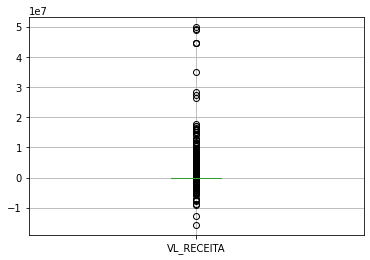

In [27]:
boxplot = dataset.boxplot(column=['VL_RECEITA'])

Pelo que parece, no dataset é comum ter valores negativos, visto que tem muitos abaixo de -1000000. Mas também existem outliers positivos, visto que tem pouquíssimos valores acima de 2000000. Vamos excluir todos negativos, visto que são DESPESAS e não receitas, e os positivos muito grandes.

In [28]:
dataset_outliers = dataset[(dataset['VL_RECEITA'] < 0) | (dataset['VL_RECEITA'] > 2000000)]

In [29]:
dataset_outliers.count()

RECEITA                1297
CATEGORIA              1297
DESCRICAO_CATEGORIA    1297
ORIGEM                 1297
DESCRICAO_ORIGEM       1297
ESPECIE                1297
DESCRICAO_ESPECIE      1297
EXERCICIO              1297
DT_APROPRIACAO         1297
TP_RECEITA_ORC         1297
EMPRESA                1297
NM_EMPRESA             1297
VL_RECEITA             1297
DS_FONTE,,,            1297
dtype: int64

Podemos verificar que existem 1297 valores que estão ou abaixo de 0 e acima de 2M. Vamos salvar esse dataset separado.

In [30]:
dataset_outliers.to_csv("dataset_outliers.csv", encoding = 'utf-8')

Agora, vamos retirar esses valores do dataset original

In [31]:
dataset = dataset.drop(dataset[(dataset['VL_RECEITA'] < 0) | (dataset['VL_RECEITA'] > 2000000)].index)
dataset

,RECEITA,CATEGORIA,DESCRICAO_CATEGORIA,ORIGEM,DESCRICAO_ORIGEM,ESPECIE,DESCRICAO_ESPECIE,EXERCICIO,DT_APROPRIACAO,TP_RECEITA_ORC,EMPRESA,NM_EMPRESA,VL_RECEITA,"DS_FONTE,,,"
1,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,226.07,"Taxas - Exercício Poder de Polícia,"
2,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,270.03,"Taxas - Exercício Poder de Polícia,"
3,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,37.68,"Taxas - Exercício Poder de Polícia,"
4,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,2143.55,"Taxas - Exercício Poder de Polícia,"
5,1121040101000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",2,TAXAS,2022,2022-09-23,Orçamentária,1,Prefeitura Municipal de Curitiba,364.22,"Taxas - Exercício Poder de Polícia,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90074,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,143.75,"Demais Impostos Vinculados à Educação Básica,"
90075,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,345.01,"Recursos Ordinários (Livres),"
90076,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,251.38,"Saúde - Receitas Vinculadas (EC 29/00 - 15%),"
90077,1112500402000000000000,1,Receitas Correntes,1,"Impostos,Taxas e Contribuições de Melhoria",1,IMPOSTOS,2022,2022-08-18,Orçamentária,1,Prefeitura Municipal de Curitiba,418.97,"Demais Impostos Vinculados à Educação Básica,"


Como podemos ver, as linhas foram retiradas, agora vamos novamente fazer a estatística descritiva

In [32]:
dataset['VL_RECEITA'].mean()

15105.893217282517

In [33]:
dataset['VL_RECEITA'].median()

500.0

In [34]:
dataset['VL_RECEITA'].mode()

0    100.0
dtype: float64

In [35]:
dataset['VL_RECEITA'].std()

86488.60194417328